In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
os.listdir()
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv('attacks.csv', encoding="ISO-8859-1")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
Case Number               8702 non-null object
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       5737 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href formula              6301 non-null object
href                      6302 non-null obje

(25723, 24)

In [4]:
df[df['Year'] > 1930].sort_values(by=['Year'])
df['Years>1930'] = df[df['Year'] > 1930]['Year']
df.sort_values(by=['Year'])
years_greater_1930 = df['Years>1930'].value_counts().sort_index()
years_greater_1930

1931.0     29
1932.0     27
1933.0     22
1934.0     27
1935.0     32
1936.0     32
1937.0     30
1938.0     24
1939.0     25
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
1945.0     16
1946.0     26
1947.0     30
1948.0     29
1949.0     31
1950.0     43
1951.0     32
1952.0     29
1953.0     36
1954.0     42
1955.0     43
1956.0     51
1957.0     41
1958.0     54
1959.0     93
1960.0     93
         ... 
1989.0     53
1990.0     38
1991.0     38
1992.0     56
1993.0     56
1994.0     56
1995.0     76
1996.0     61
1997.0     57
1998.0     65
1999.0     66
2000.0     97
2001.0     92
2002.0     88
2003.0     92
2004.0     92
2005.0    103
2006.0    103
2007.0    112
2008.0    122
2009.0    120
2010.0    101
2011.0    128
2012.0    117
2013.0    122
2014.0    127
2015.0    143
2016.0    130
2017.0    136
2018.0     53
Name: Years>1930, Length: 88, dtype: int64

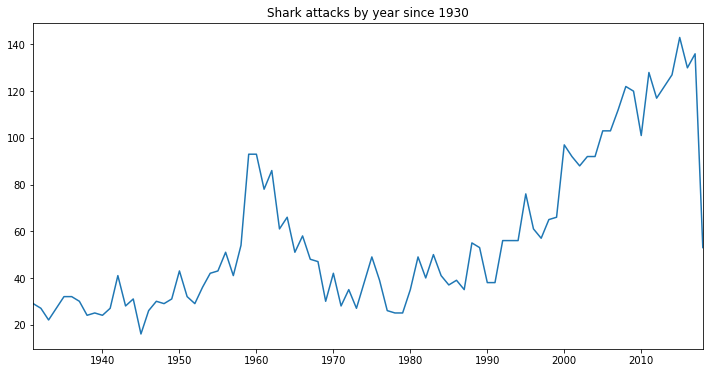

In [5]:
plt.figure(figsize=(12,6))
years_greater_1930.plot(title='Shark attacks by year since 1930')
plt.show();

### Age of shark victims

In [6]:
list(df)

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species ',
 'Investigator or Source',
 'pdf',
 'href formula',
 'href',
 'Case Number.1',
 'Case Number.2',
 'original order',
 'Unnamed: 22',
 'Unnamed: 23',
 'Years>1930']

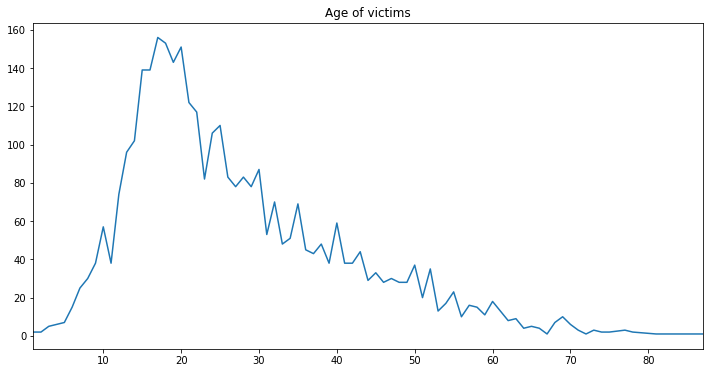

In [7]:
df.Age.value_counts()
df['Age_cleaned'] = df.Age.str.extract(r'([0-9]+)', expand=True).dropna().astype(int)
df.Age_cleaned.value_counts()
age_values = df.Age_cleaned.value_counts().sort_index()
plt.figure(figsize=(12,6))
age_values.plot(style="-", title = 'Age of victims');

### When do shark attacks happen

In [8]:
df.rename(columns= {'Species ': 'Species'}, inplace=True)

In [9]:
desired_cols=['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species',
 'Investigator or Source',]

df[desired_cols]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018"
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018"
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com"
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com"
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com"


### For what activity are shark attachs more prevalent

In [10]:
df['Activity'].value_counts()

Surfing                                                                                                                                                                                      971
Swimming                                                                                                                                                                                     869
Fishing                                                                                                                                                                                      431
Spearfishing                                                                                                                                                                                 333
Bathing                                                                                                                                                                                      162
Wading                             

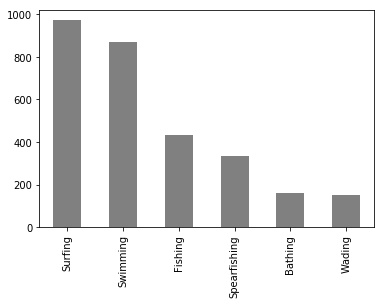

In [11]:
df[df['Activity'].str.len() < 30]['Activity'].value_counts()


df.groupby('Activity')\
    .filter(lambda x: len(x) > 140)\
    .Activity.value_counts()\
    .plot.bar(color='grey')

### What species of sharks attack often

White shark                                                                                     163
Shark involvement prior to death was not confirmed                                              105
Invalid                                                                                         102
Shark involvement not confirmed                                                                  88
Tiger shark                                                                                      73
Shark involvement prior to death unconfirmed                                                     68
Bull shark                                                                                       52
6' shark                                                                                         40
4' shark                                                                                         40
Questionable incident                                                                            35


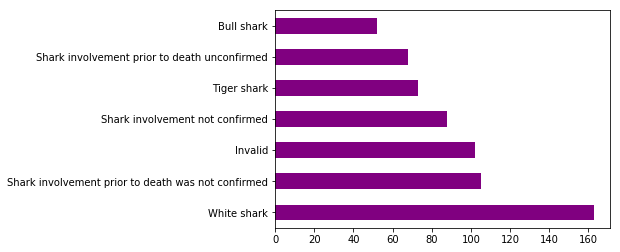

In [12]:
df[desired_cols]
sharks = df['Species'].value_counts()
sharks[sharks >50].plot.barh(color='purple')
sharks

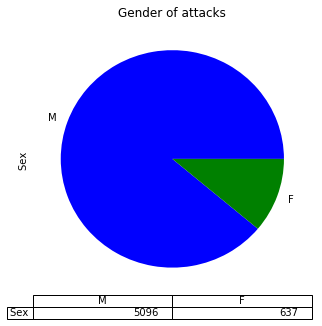

In [13]:
# Are the victims more of male of female ?

df['Sex '] = df['Sex '].str.strip()
df[df['Sex '].isin(['M', 'F'])]['Sex '].value_counts().plot(kind='pie',
                                                           title = "Gender of attacks", figsize=(5,5),
                                                           colors = ['blue', 'green'], table=True);

In [14]:
# How many fatal attacks

list(df[desired_cols])

['Case Number',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex ',
 'Age',
 'Injury',
 'Fatal (Y/N)',
 'Time',
 'Species',
 'Investigator or Source']

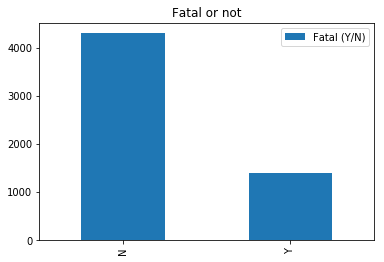

In [15]:
df['Fatal (Y/N)']= df['Fatal (Y/N)'].str.strip()
df['Fatal (Y/N)'].value_counts()
df[df['Fatal (Y/N)'].isin(['N', 'Y'])]['Fatal (Y/N)'].value_counts().plot(kind='bar',
                                                                         title='Fatal or not', legend= True
                                                                         )


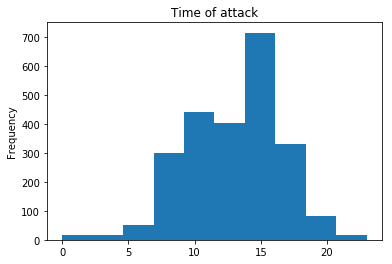

In [16]:
# What time do shark attacks happen ?

df['Clean_hr'] = df['Time'].str.extract(r'([0-9]+)', expand=True).dropna().astype(int)
df['Clean_hr'] = df[df['Clean_hr'] <25]['Clean_hr']
df['Clean_hr'].plot(kind='hist', title= 'Time of attack')

In [17]:
# Where do shark attacks happen often ? Which country

df[['Country', 'Location']][:2]

,Country,Location
0,USA,"Oceanside, San Diego County"
1,USA,"St. Simon Island, Glynn County"


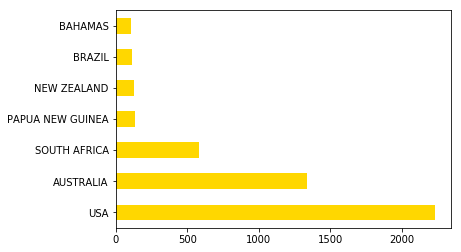

In [18]:
df.groupby("Country")\
    .filter(lambda x: len(x) > 100)\
    .Country.value_counts()\
    .plot.barh(color='gold')

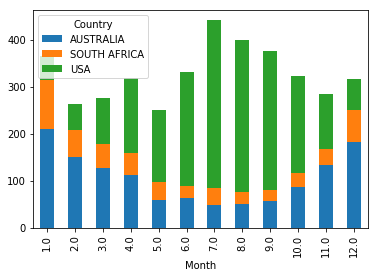

In [19]:
# In winter or summer
df['Month'] = df['Case Number'].str.extract("\.([0-9]+)\.", expand=False).dropna().astype(int)
df['Month'].value_counts()

df['Month']= df[(df['Month'] > 0) & (df['Month'] < 13)]['Month']

df.groupby('Country')\
    .filter(lambda x:len(x) > 300)\
    .groupby(['Country', "Month"])\
    .size().to_frame().unstack(level='Country')[0].plot.bar(stacked=True, legend=True)

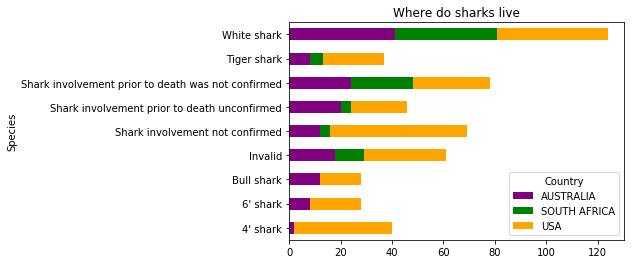

In [21]:
# Where do Sharks live ?
df.groupby('Species').filter(lambda x: len(x) > 35)\
    .groupby('Country').filter(lambda x:len(x) > 25)\
    .groupby(['Country', 'Species'])\
    .size().to_frame().unstack(level='Country')[0].plot.barh(stacked=True,
                                                            title ='Where do sharks live',
                                                            color=['purple', 'green', 'orange'], legend= True)

In [22]:
indexes = df.loc[df.Species.str.len() < 20]['Species'].str.extract('([A-za-z ]+)', expand=True).index

In [23]:
df.iloc[indexes]['Species']

0               White shark
3                 2 m shark
4           Tiger shark, 3m
6               Tiger shark
7           Lemon shark, 3'
8            Bull shark, 6'
10          Grey reef shark
13         Invalid incident
18              Tiger shark
20             Questionable
21                3 m shark
22       White shark, 3.5 m
23              Tiger shark
24       White shark, 2.5 m
25                 6' shark
26      Juvenile bull shark
30              Tiger shark
32                2 m shark
33               Bull shark
34              White shark
35         Tiger shark, 12'
36          Wobbegong shark
37              3.5 m shark
38              1.8 m shark
39           Blacktip shark
42          Bull shark, 2 m
45         Galapagos shark?
46                 2m shark
47               Bull shark
48         Bull shark, 3 m 
               ...         
6110                Invalid
6131              12' shark
6139           Tiger shark?
6145           White sharks
6162            Whit

In [42]:
# WHich months are the most deadliest
#df.drop('Fatal_status', axis=1, inplace=True)
df['fatal_binary']= df[df['Fatal (Y/N)'].isin(['Y', 'N'])]['Fatal (Y/N)'].str.replace('N', '0').str.replace('Y', '1').dropna().astype(int)

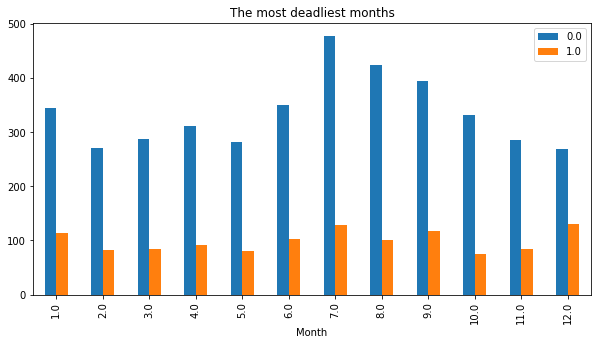

In [50]:
df['fatal_binary']
df.groupby(['Month', 'fatal_binary'])\
    .size().to_frame().unstack(level='fatal_binary')[0].plot.bar(title='The most deadliest months', figsize=(10,5))
plt.legend(loc='best')

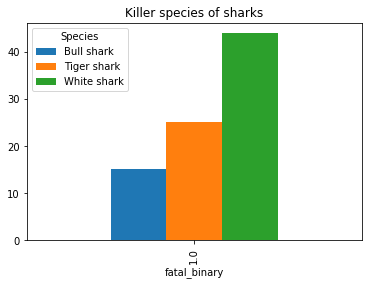

In [59]:
# Who are the killer sharks

list(df[desired_cols])
df[df['fatal_binary'] == 1]\
    .groupby('Species').filter(lambda x:len(x) > 10)\
    .groupby(['Species', 'fatal_binary'])\
    .size().to_frame().unstack('Species')[0].plot.bar(title= 'Killer species of sharks')

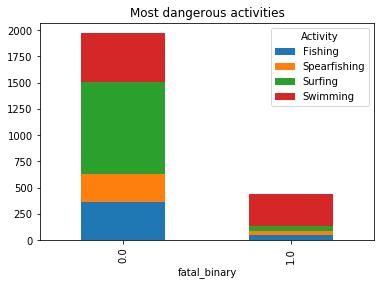

In [65]:
# MOst fatal activities
df.groupby('Activity')\
    .filter(lambda x: len(x) > 300)\
    .groupby(['Activity','fatal_binary'])\
    .size().to_frame().unstack(level=0)[0].plot.bar(stacked=True, title='Most dangerous activities')

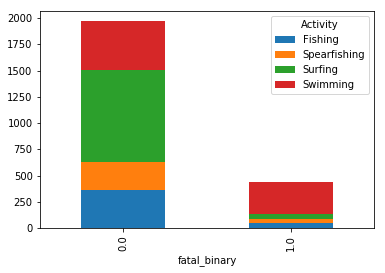

In [95]:
df.groupby(['Activity']).filter(lambda x: len(x) > 300)\
    .groupby(['fatal_binary', 'Activity'])\
    .size().to_frame().unstack(level=1)[0].plot(kind='bar', stacked=True)